---
---

# **1 - Clustering**

Clustering uses **unlabeled data** and looks for similarities between groups (clusters) in order to attempt to segment the data into separate clusters. Keep in mind that we dont actually know the true correct label for this data.

How could we cluster this data together?

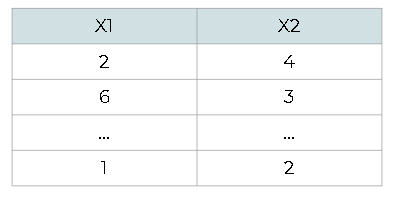

We could then assign cluster:

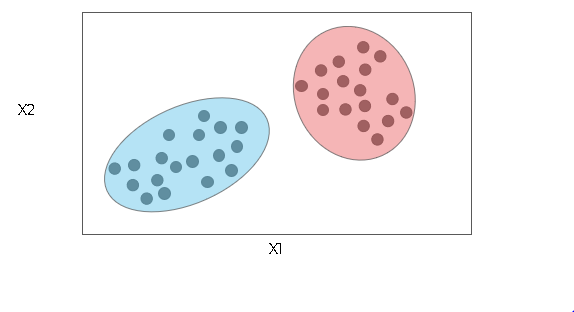

Note how distance is the intuitive metric.

We dont actually know for sure if this is a correct way of grouping together these data points, there was no correct label to begin with. And what about situatuins that are not so obvious or multi-dimensional?

2 or 3 clusters coulb both be reasonable:

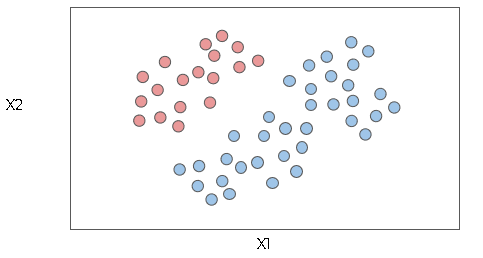

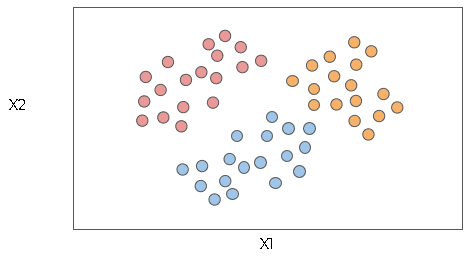

**Clustering doesnt "label" these for you!**

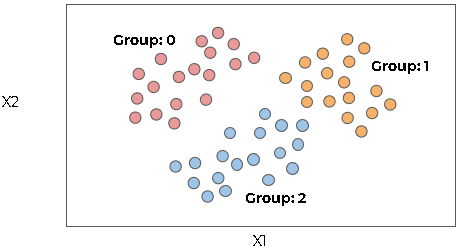

**Main Clustering Ideas:**
* **Use features to decide which points are most similar to other points.**
* **Realize that there is no final correct y label to compare cluster results to**
* **We can think of clustering as an unsupervised learning process that "discovers" potential labels**

We can use unsupervised learning to discover possible labels, then apply supervised learning on new data points. The trade-off is clustering doesnt tell you what these new cluster labels represent, no real way of knowing if these clusters are truly significant.

---
---

# **2 - K-Means Clustering Theory**

A set of properties each point must satisfy:
* **Each point must belong to a cluster.**
* **Each point can only belong to one cluster (no single point can belong to multiple clusters).**

---
**How K-Means Clustering works**

---

1. Start with unlabeled data (only features).

  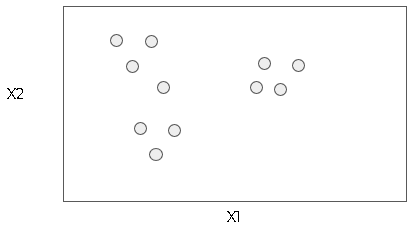

2. Choose the number of clusters to create (this is the K value). We choose K=3. **Note in most situations you wont visualize the data!.** Randomly select K distinct data points, we treat these K points as our "cluster" points.

  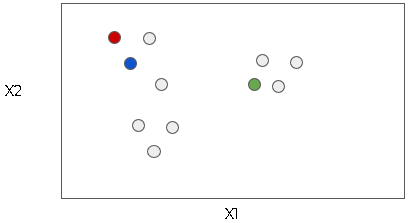



3. Assign each remaining point to the nearest "cluster" point. **Note how this is using a distance metric to judge the nearest point.**

  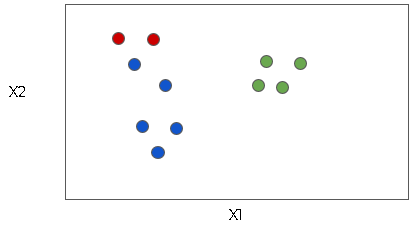


4. Calculate the center of the cluster points (mean value of point vectors).

  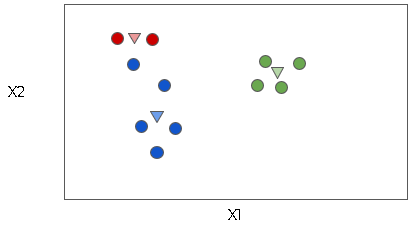

5. Now assign each point to the nearest cluster center.

  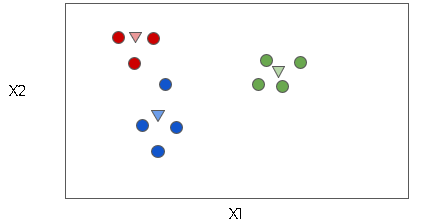

6. Repeat steps 4 and 5 until there are no more cluster reassignments.

  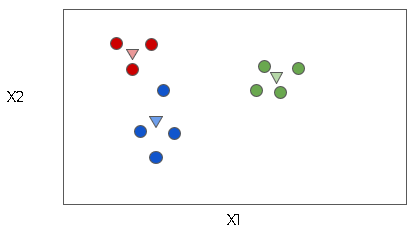

7. If there are no more reassignments, we're done.

---
**How to choose reasonable K value of clusters?**

---

Here we have 3 clusters, how can we measure "goodness of fit"?

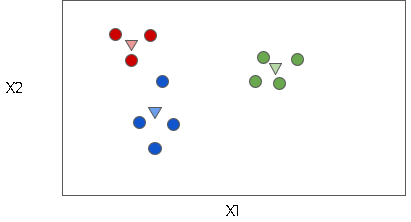

We could measure the sum of the distances from the points to cluster centers.

We keep track of this sum of squared distance (SSD) value for a range of different K values. We then look for a K value where **rate of reduction in SSD** begins to decline. This signifies that adding an extra cluster is not obtaining enough clarity of cluster separation to justify increasing K.

Start with K=2:

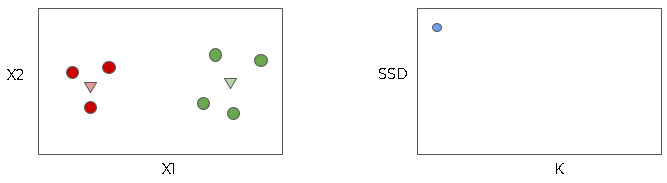

Increase K and measure SSD:

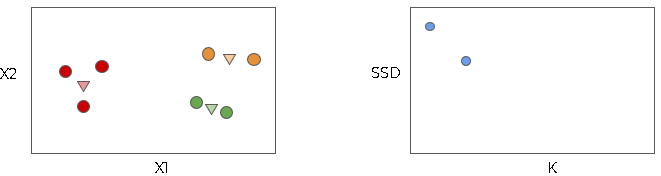

Repeat this process for some set number of K values:

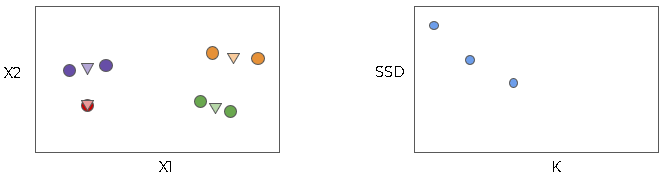

Eventually you will see "elbow" points:

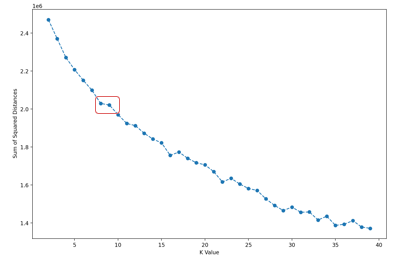

These points are strong indicators that increasing K further is no longer justified as it is not revealing more signal.

---
**K-Means Color Quantization**

---

One interesting application of clustering is on image quantization.

Imagine an image of a single pen stroke. This image is in **grayscale**, meaning the color range goes from black to white.

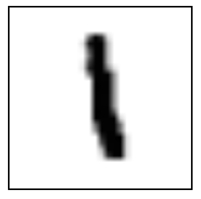

You will notice on the edges there are gray colors between black and white. A computer will store this information as an array with values between a range.

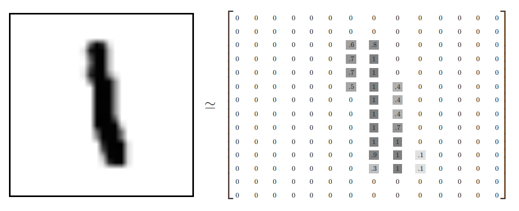

Notice 0 is white and 1 is black with values in between representing gray. It is also very common for computers to store values from 0-255 for scales. The range 0 to 255 has to do with how computers store 8-bit numbers. But you can always divide all the values by 255 to normalize to between 0 and 1.

What about color images?. Color images can be represented as a combination of Red, Green, and Blue. Additive color mixing allows a wide variety of colors by simply combining different amounts of RGB.

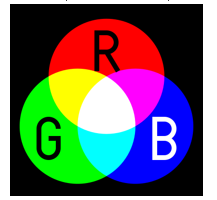

From a computer perspective, this looks like 3 arrays, each array representing color channel.

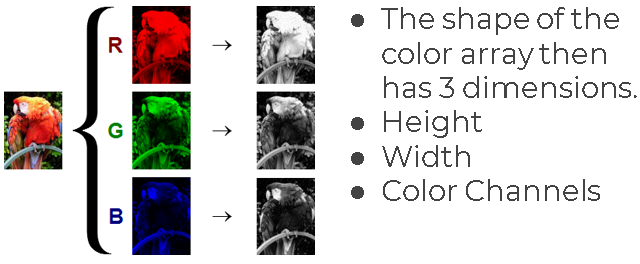

This means when you read in an image and check its shape, it will look something like:

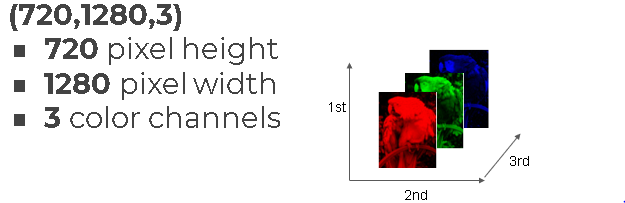

Keep in mind the computer wont "know" a channel is Red, it just knows that there are now 3 intensity channels.

The user needs to dictate which channel is for which color. Each channel alone is essentially the same as a grayscale image.

Swapping these arrays across channels would allow for effects such as color inversion.

---
**Apply Clustering to RGB color channels and images**

Imagine the following image:

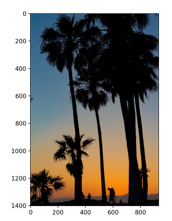

There are many shades of colors in this image, with many (R,G,B) combinations.

What if we wanted to reduce this to 6 colors for simplified display purposes?. What if we wanted to compress the image for a smaller screen with less colors?.

Recall the image is a 3D array (Height, Weight, Color Channels):

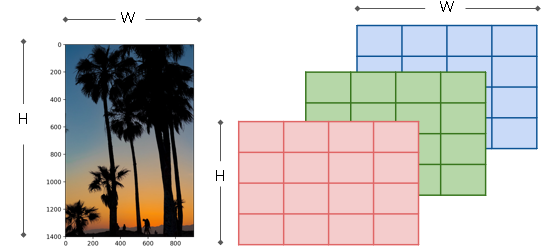

Each pixel has an RGB value to create a color:

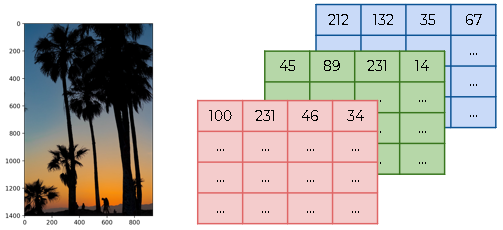

We can reshape the image to an X array feature set, with features R,G,B:

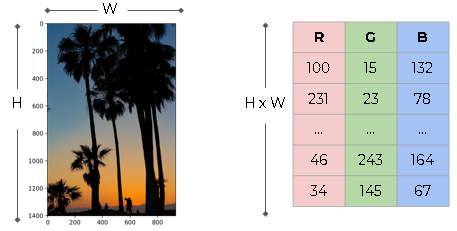

We then choose a K value of colors and use K-Means clustering to create labels:

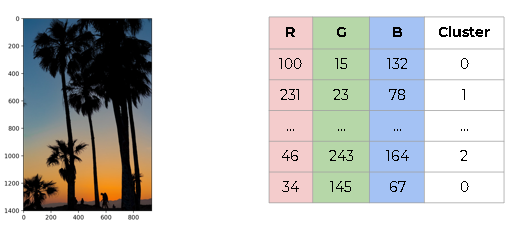

Recall each cluster also has a **center** in the N dimensional feature space. Meaning each cluster center is an average (R,G,B) value we can use for reassignment.



We can then grab each data point and convert it to the same value as the center. This directly reduces to K color values (known as quantization).

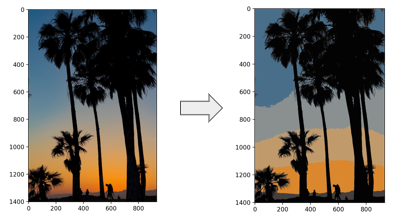

---
---

# **3 - K-Means Clustering**


unsupervised learning - clustering customer data.

## Goal:

When working with unsupervised learning methods, its usually important to lay out a general goal. In our case, let's attempt to find reasonable clusters of customers for marketing segmentation and study. What we end up doing with those clusters would depend **heavily** on the domain itself, in this case, marketing.


## **A. Dataset**

LINK: https://archive.ics.uci.edu/ml/datasets/bank+marketing

   This dataset is public available for research. The details are described in [Moro et al., 2011]. 


      [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
      In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

      Available at: [pdf] http://hdl.handle.net/1822/14838
                    [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt
     For more information, read [Moro et al., 2011].

    # bank client data:
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    # related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone')
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    # other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    # social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)
    21 - subscribed - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data_Science/Materi/Notes/15_Kmeans/bank-full.csv")

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Has no missing data

In [ ]:
df.shape

(41188, 21)

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


---

## **B. Exploratory Data Analysis**

### **a. Continuous Feature Analysis**

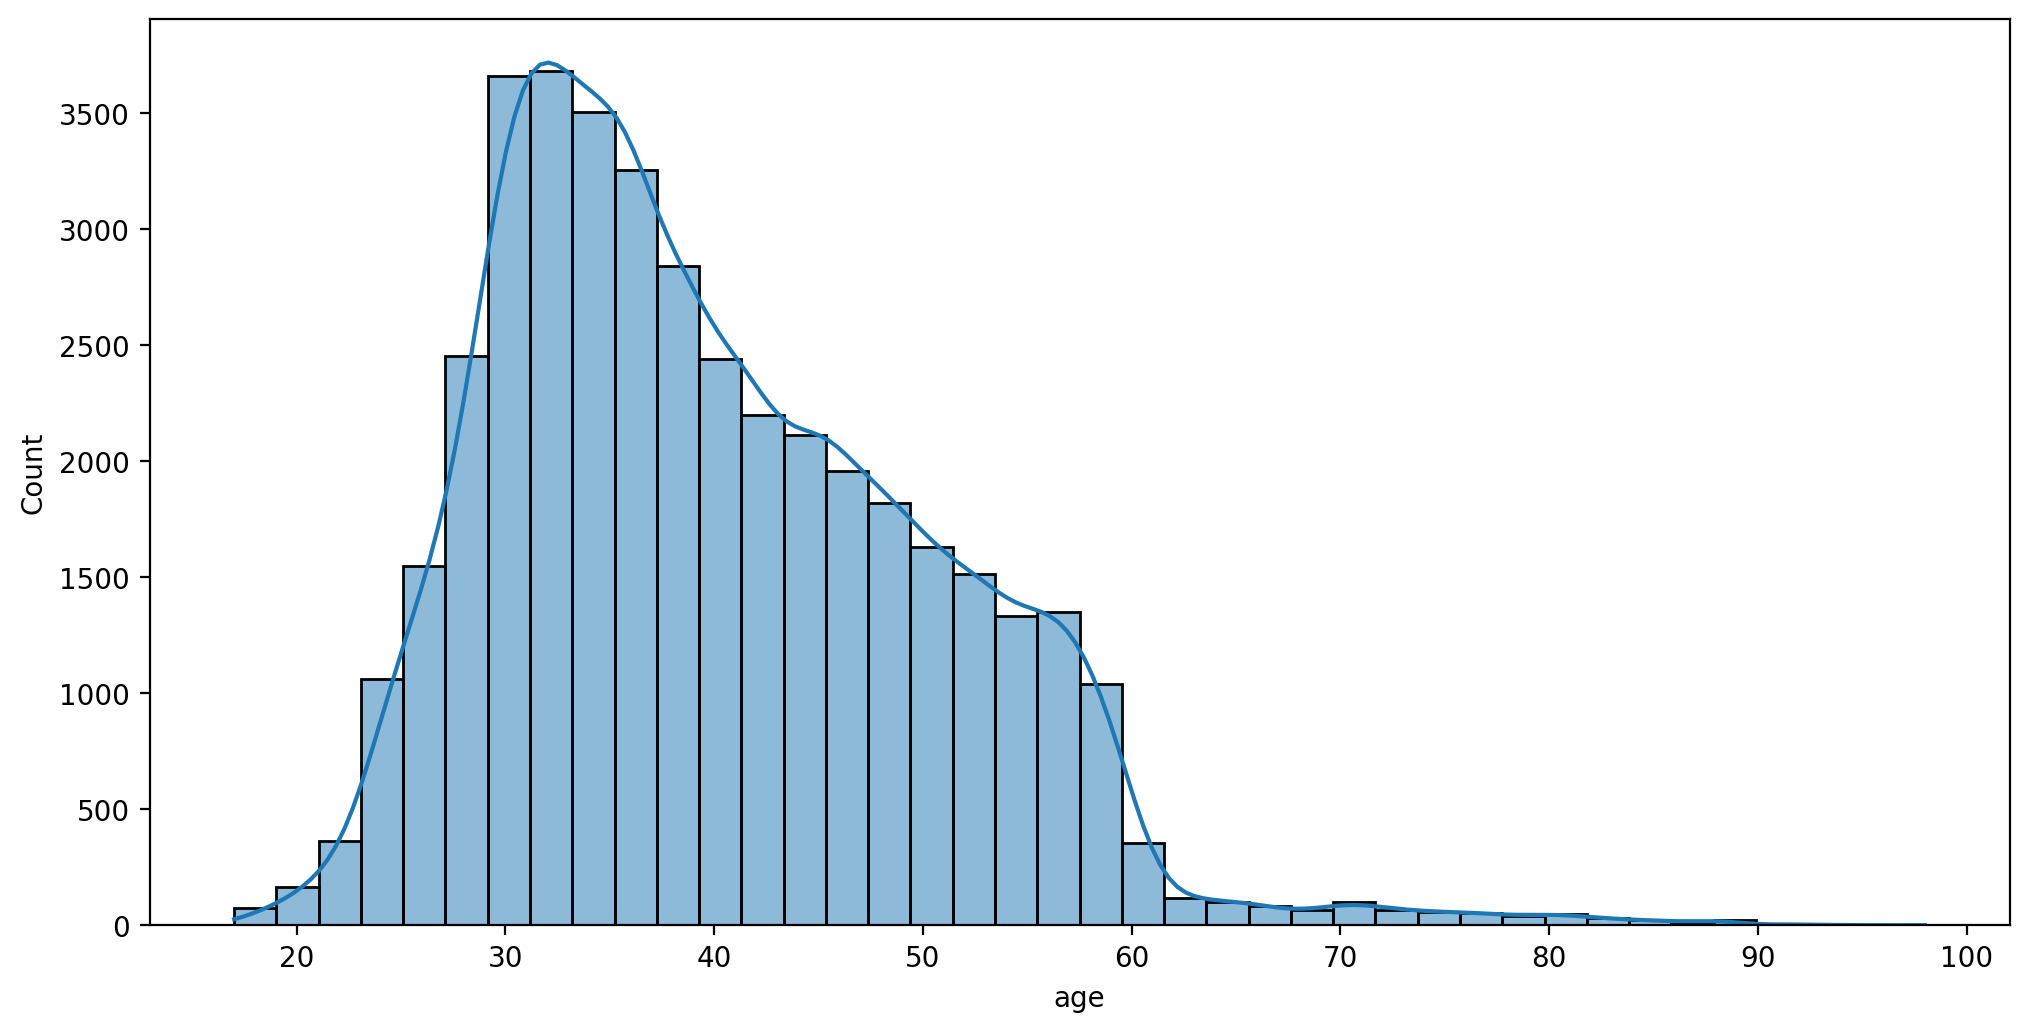

In [ ]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df, x='age', kde=True, bins=40);

* **The most age of customer is around 32.**
* **The distribution is skew to the right.**

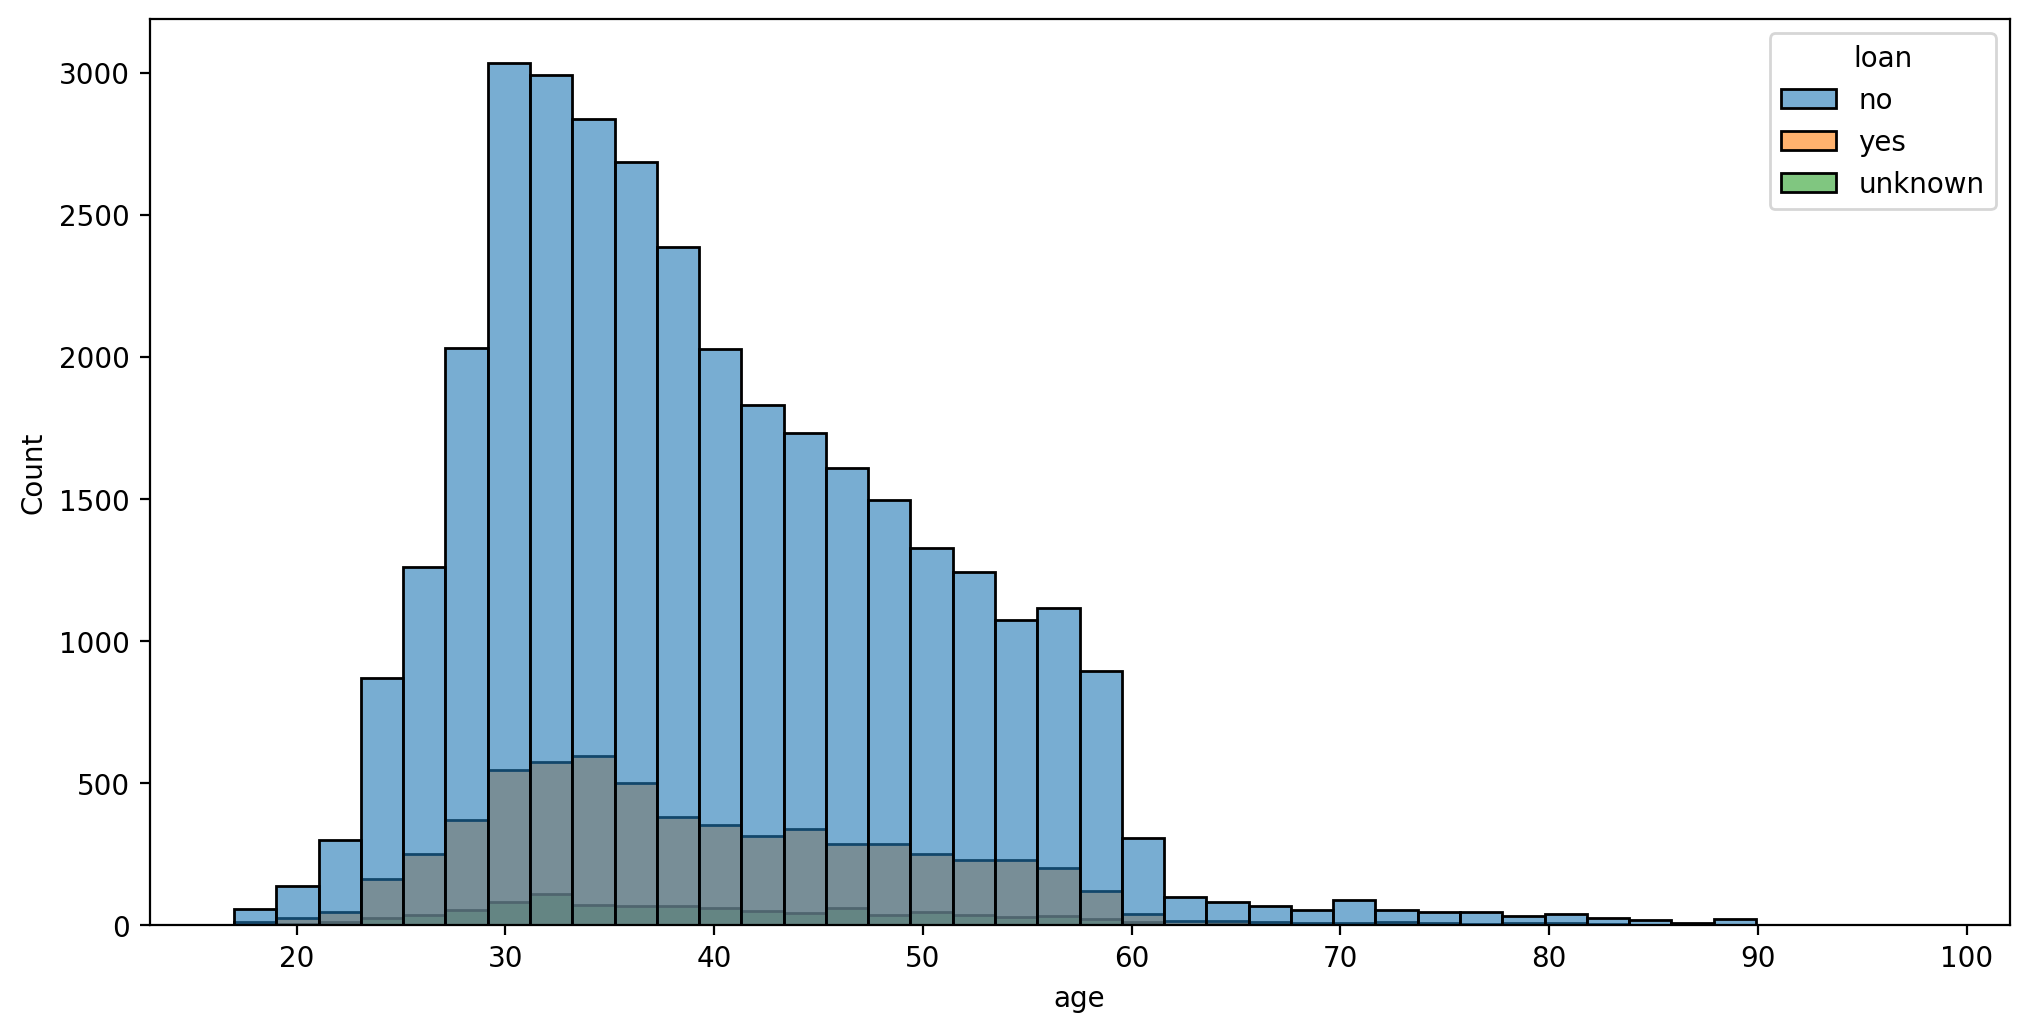

In [ ]:
# Age distribution by personal loan
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df, x='age', hue='loan', alpha=0.6, bins=40);

* **Most customer dont have personal loan.**

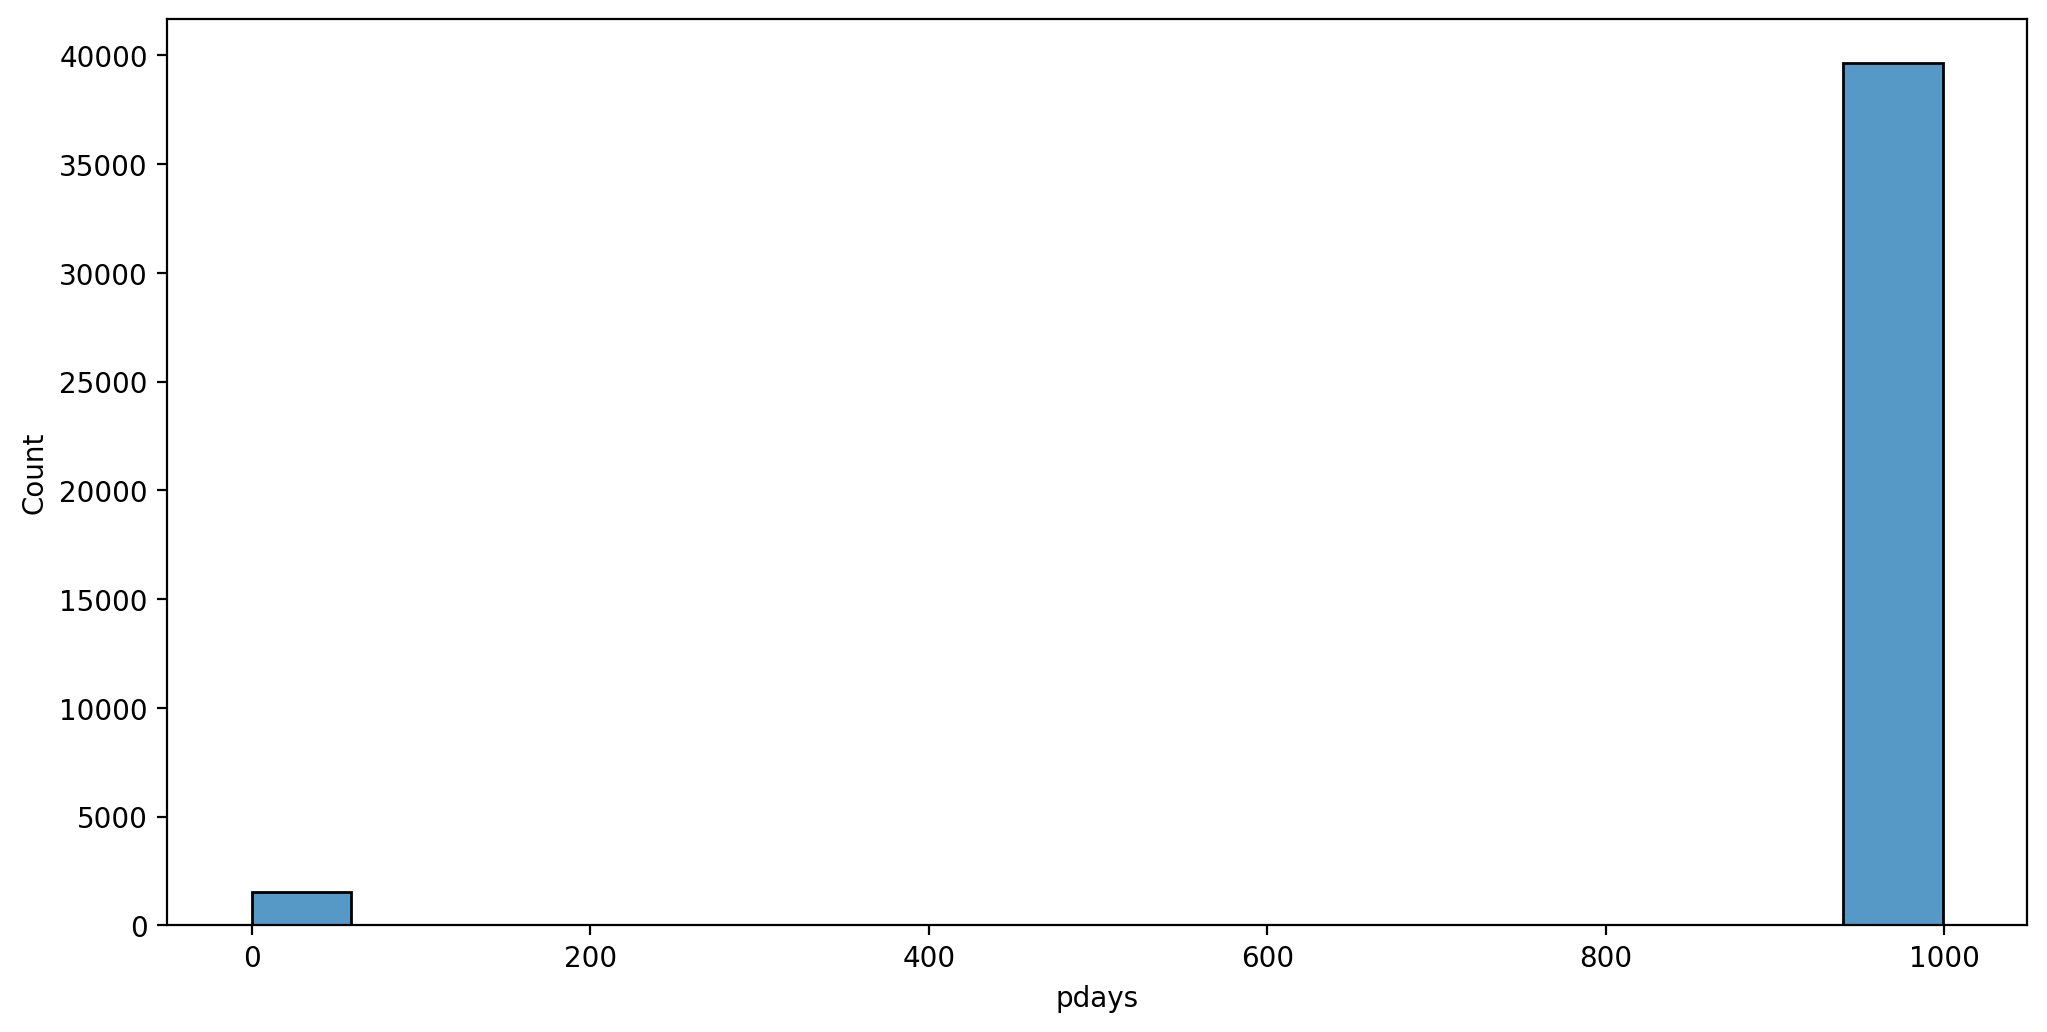

In [ ]:
# distribution of pday -> number of days that passed by after the client was last contacted
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df, x='pdays');

* **Most customer were never contacted by the marketing campaign (using 999 days as placeholder for never contacted).**

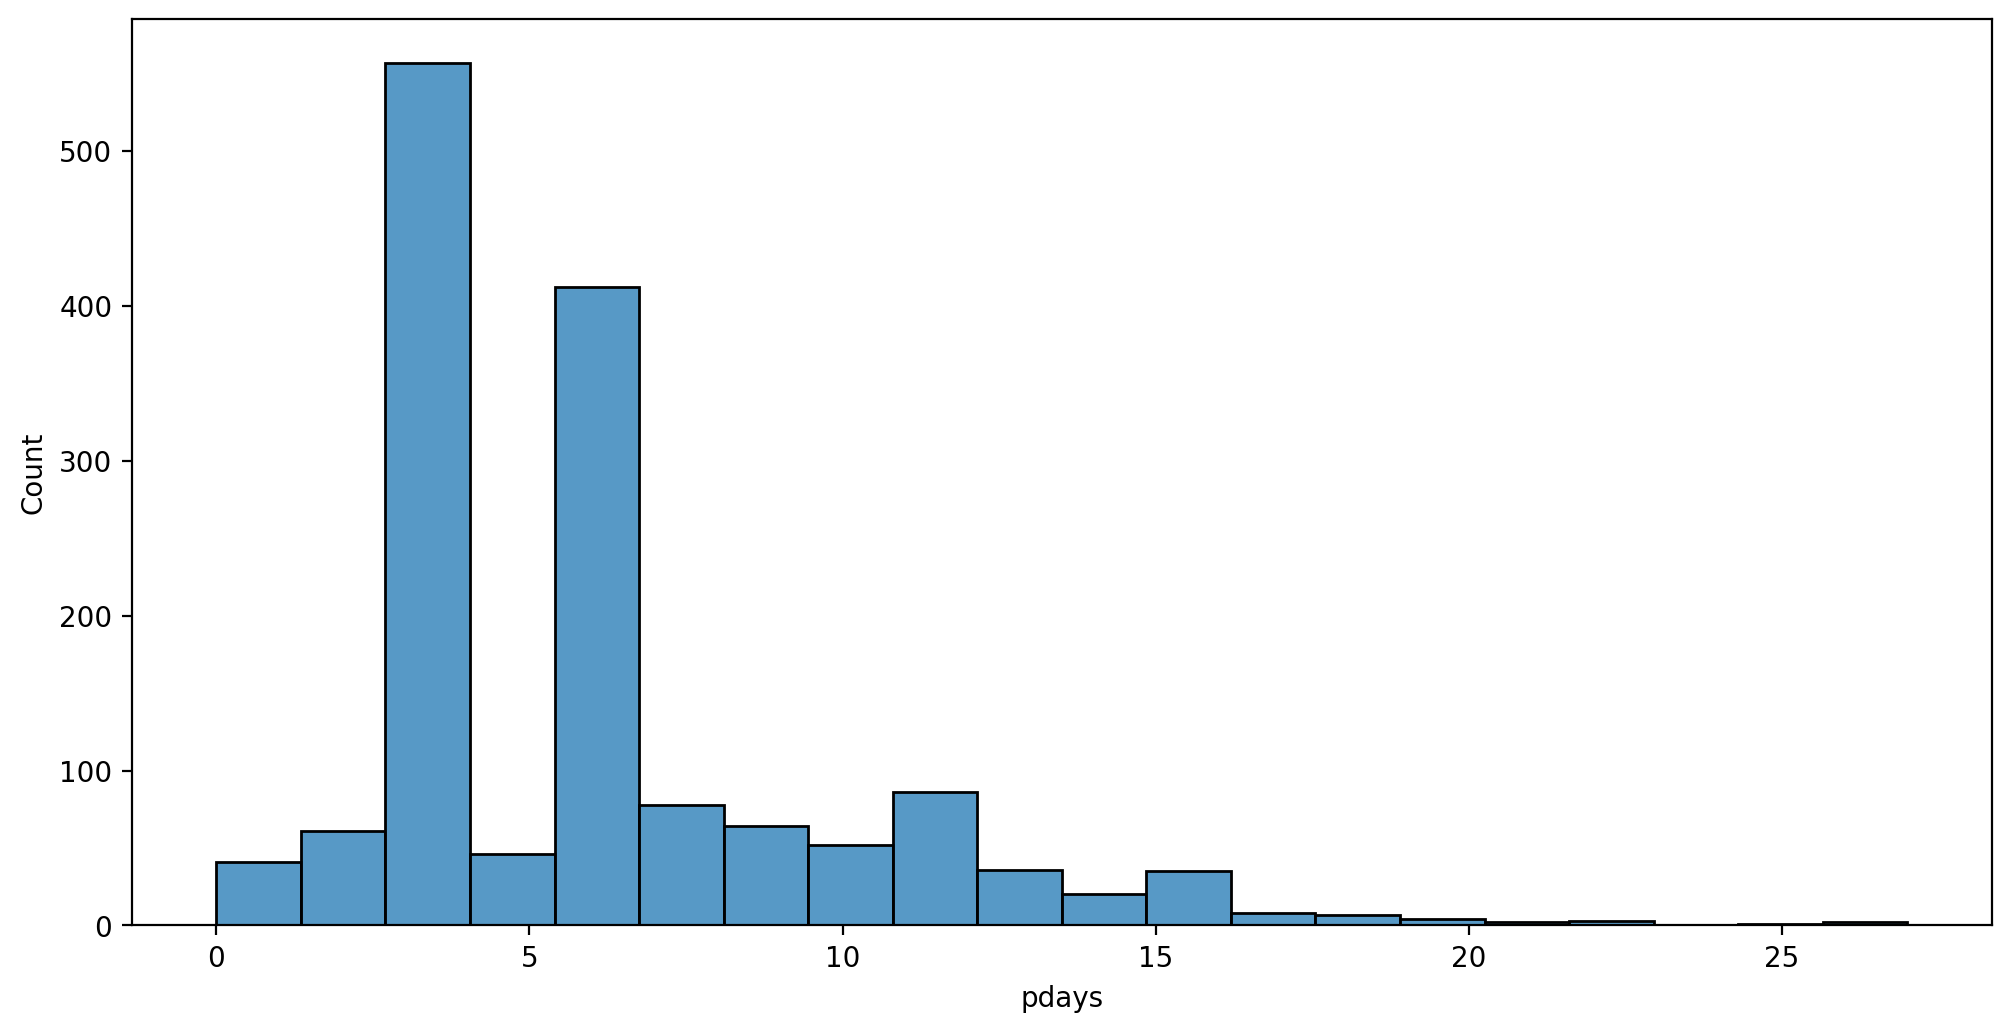

In [ ]:
# Customer that were contacted by marketing
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df[df['pdays']<999], x='pdays', bins=20);

**Contact duration - contact with customer made, how long did call last?:**

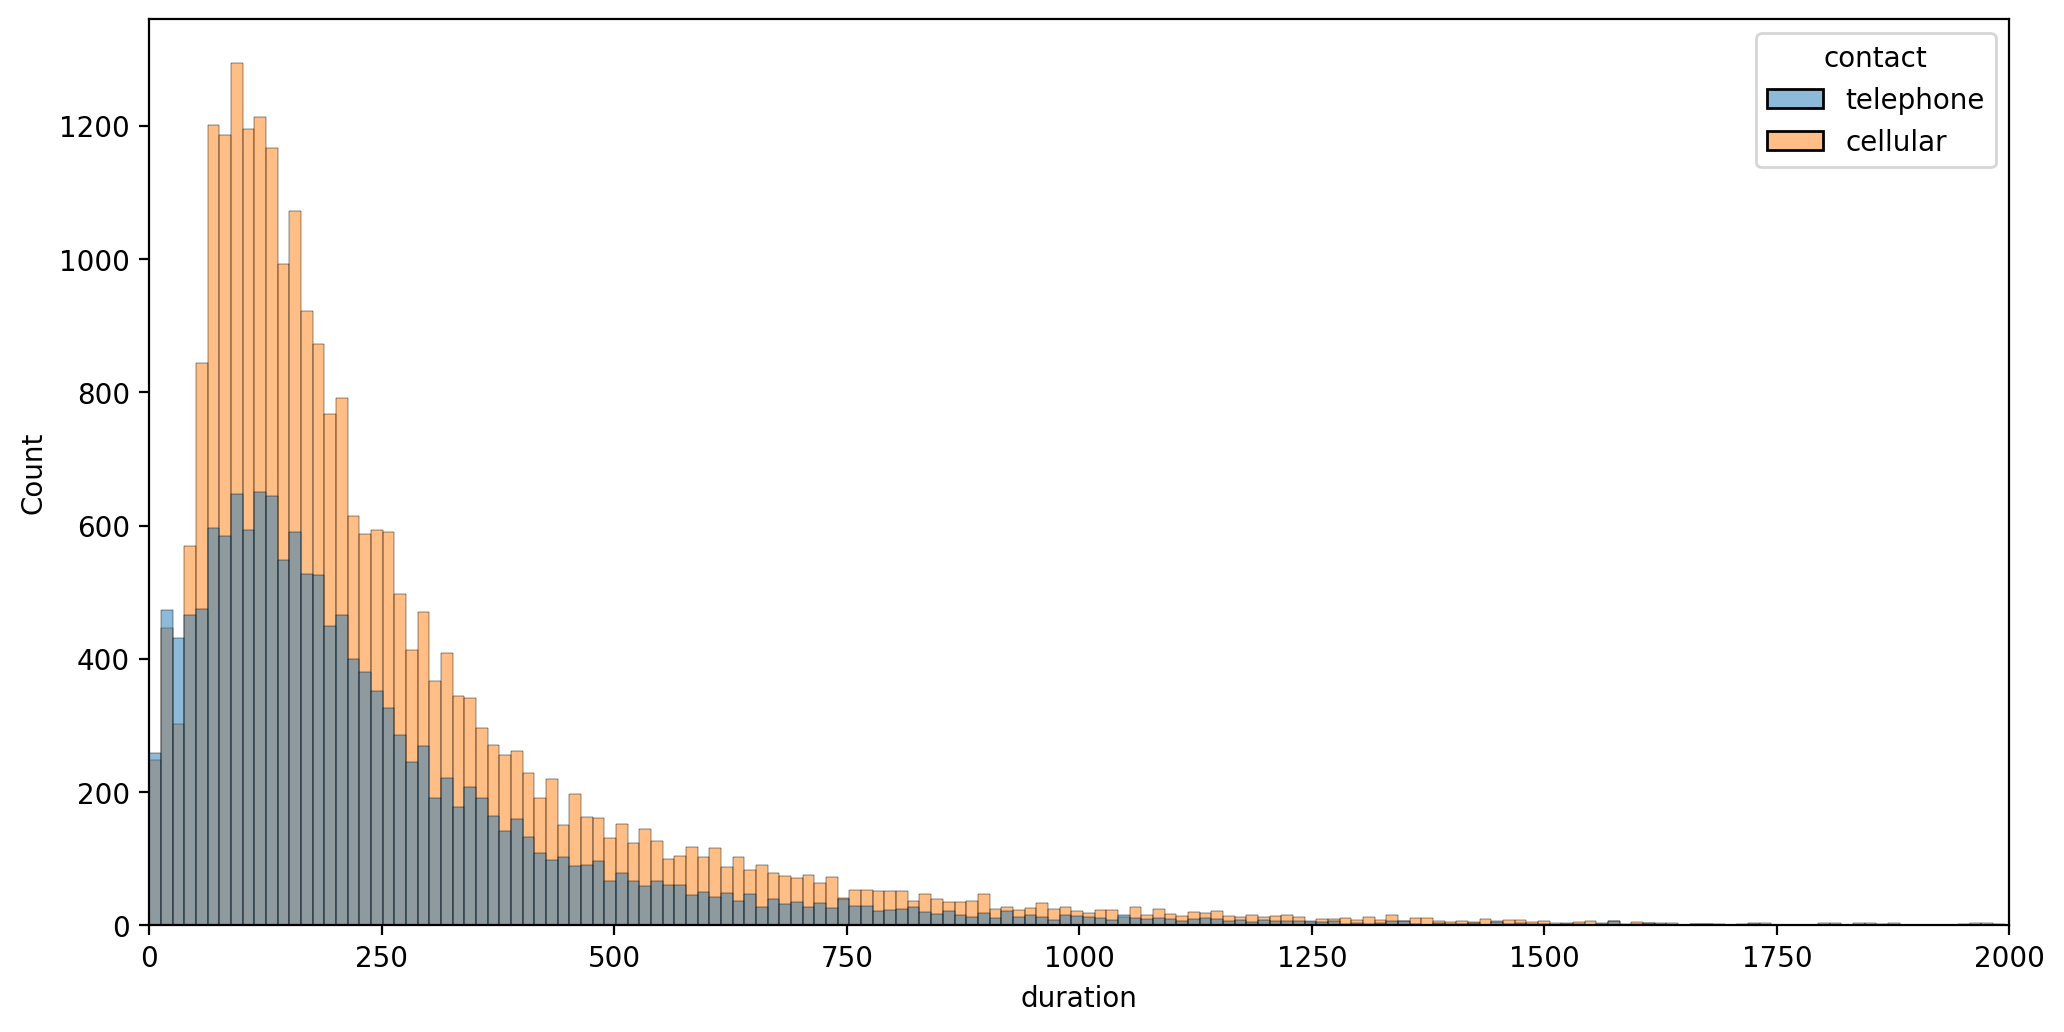

In [ ]:
# last contact duration, in seconds
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df, x='duration', hue='contact')
plt.xlim(0,2000);

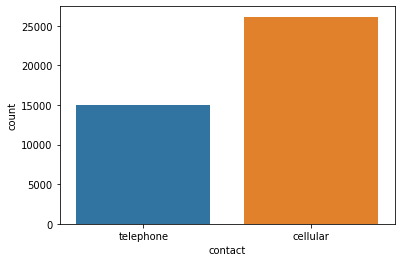

In [ ]:
sns.countplot(data=df, x='contact');

* **Most customer were contacted by cellular. But the distribution is same (same behaviour).**

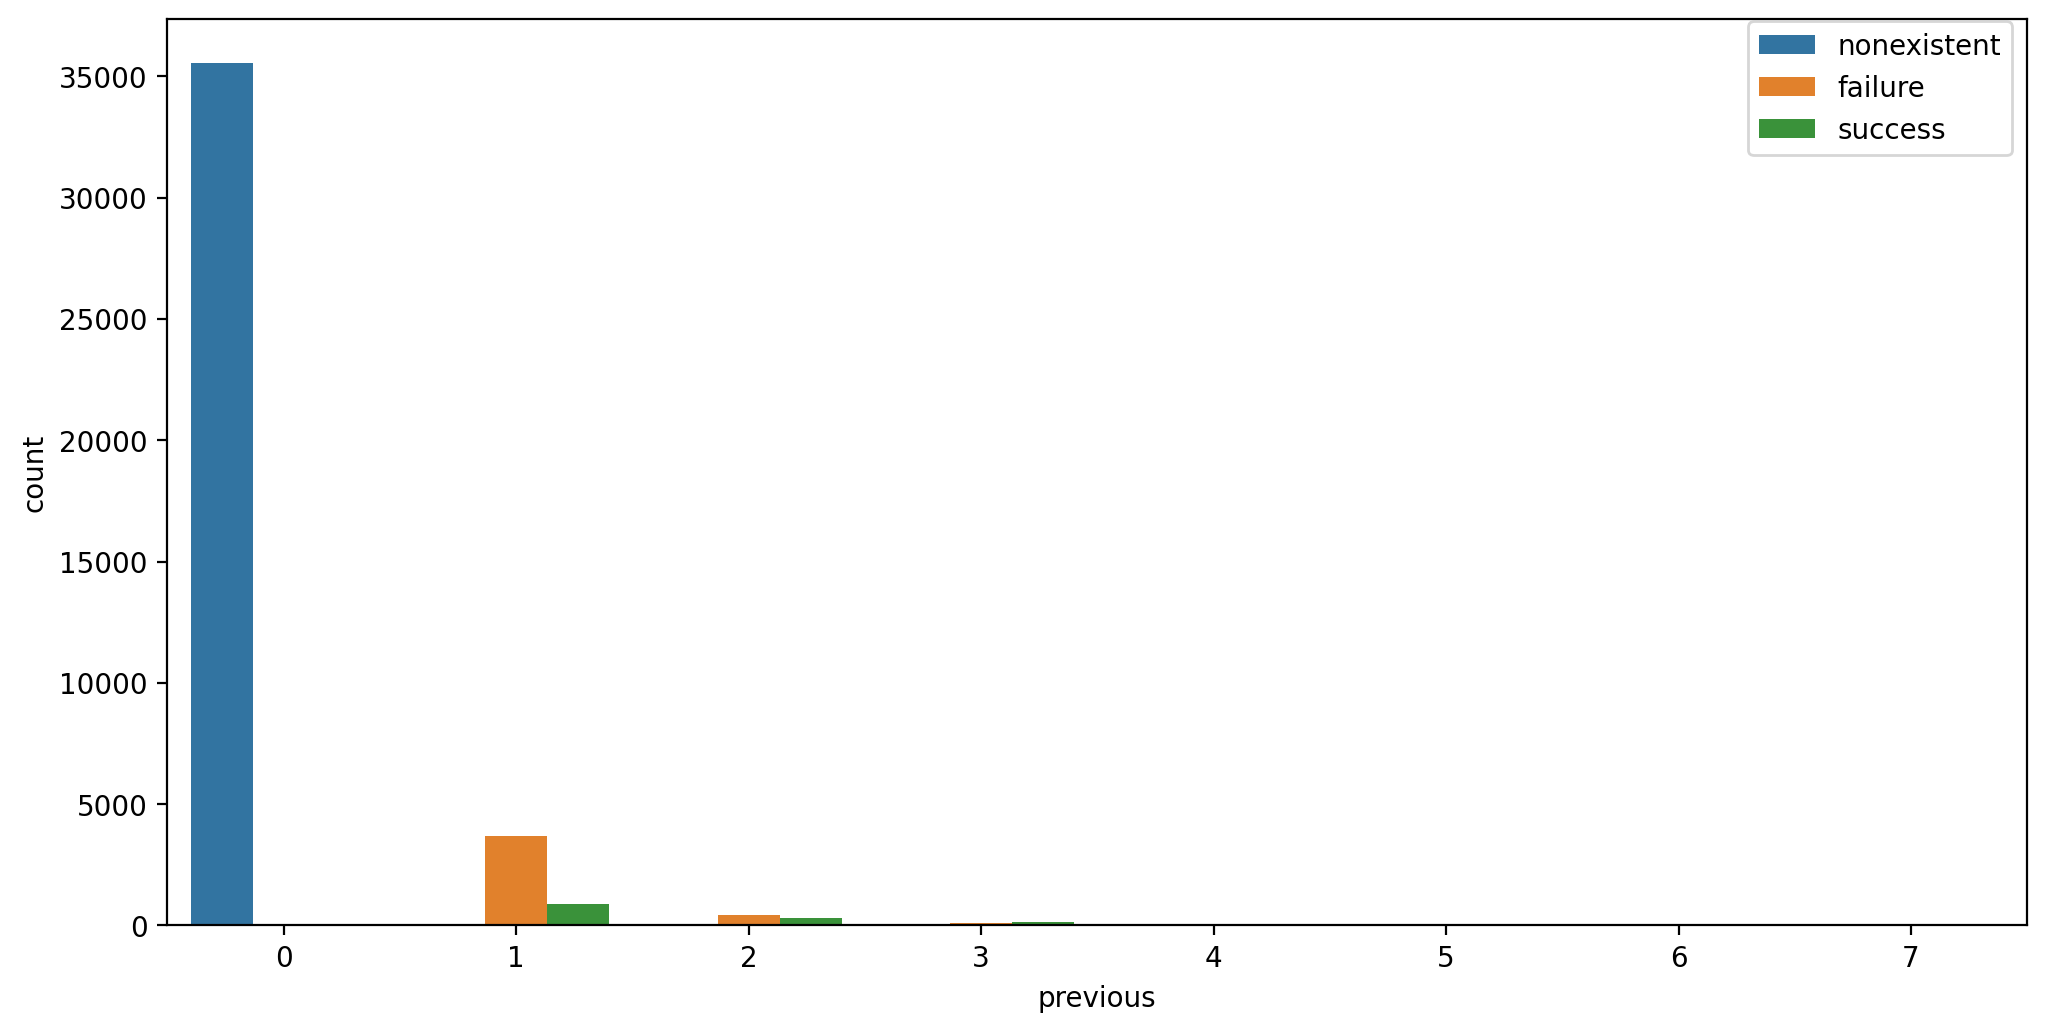

In [ ]:
# previous: number of contacts performed before this campaign and for this client (numeric)
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='previous',hue='poutcome')
plt.legend(loc=(0.85,0.85));

* **Most customer were never contacted before.**
* **Customer who already contacted have low likelihood to accept the last campaign.**

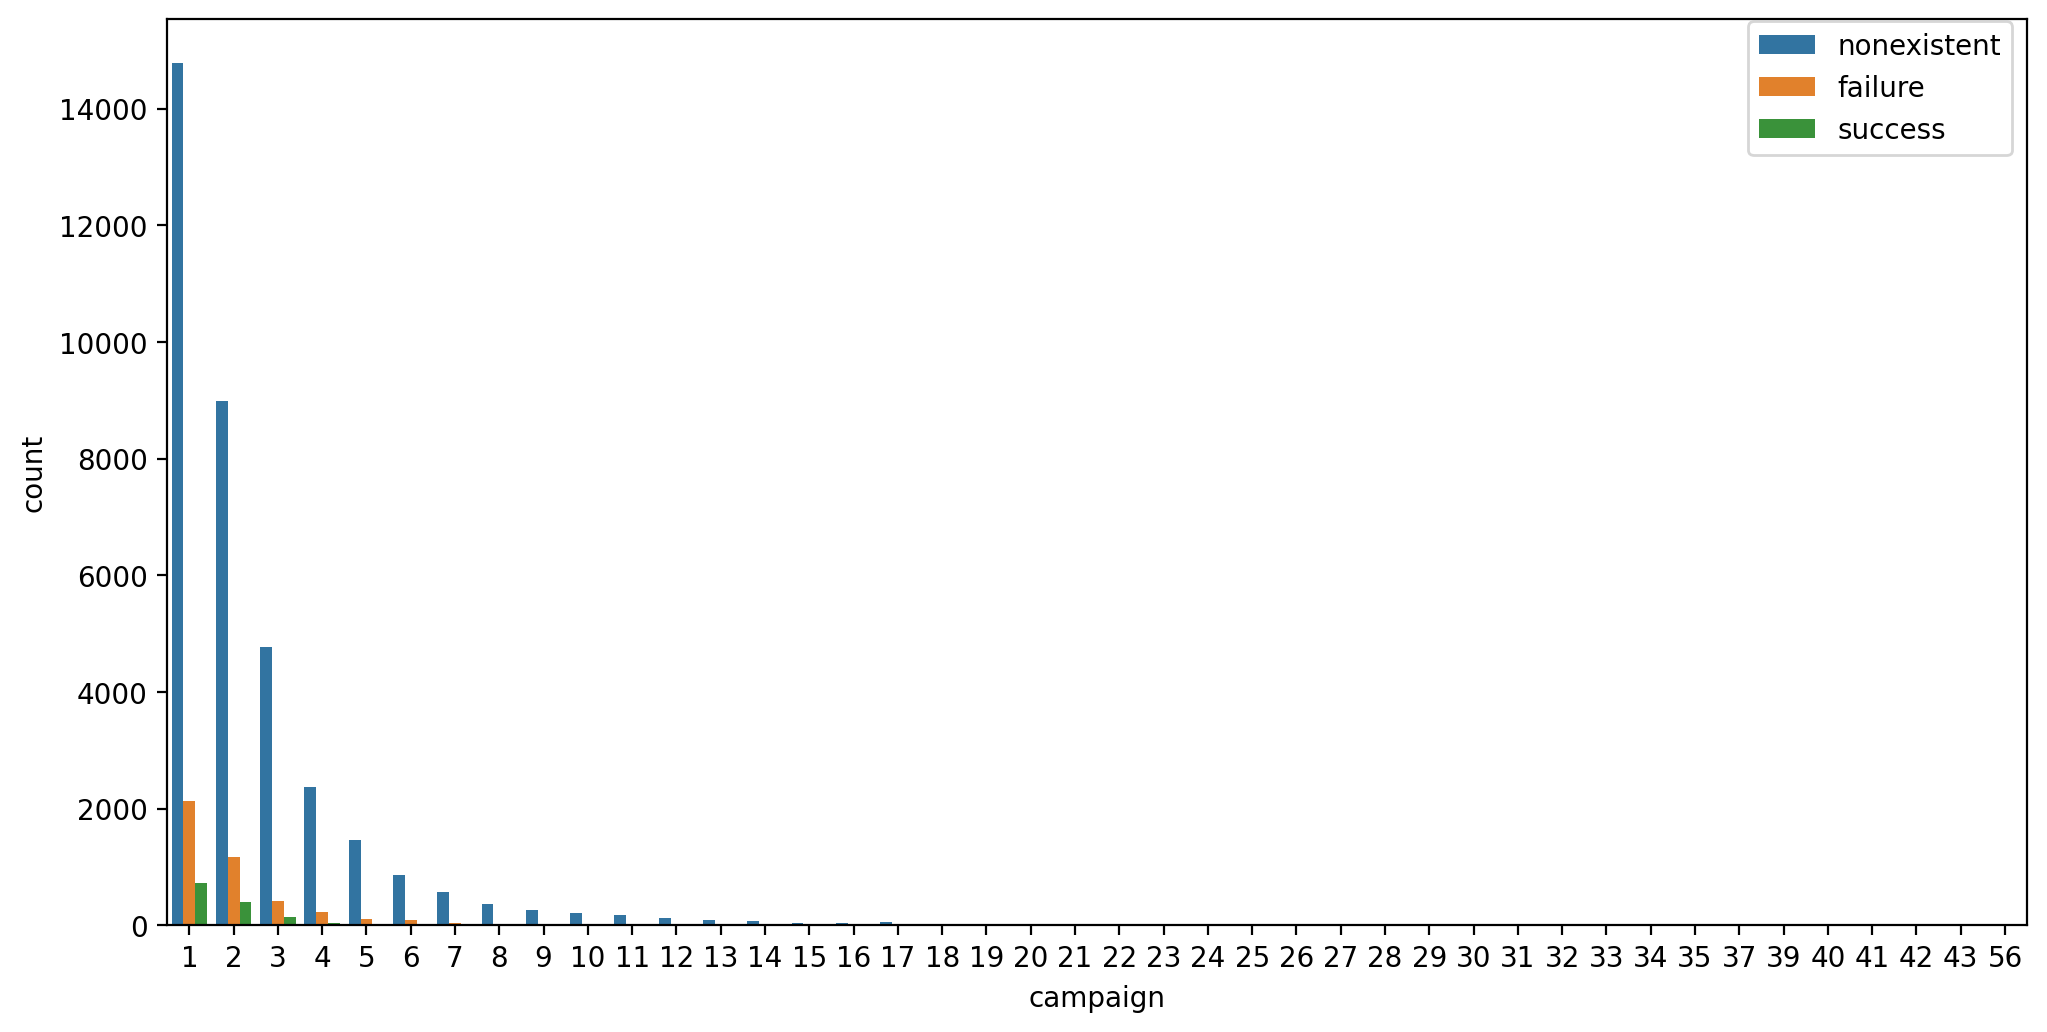

In [ ]:
# campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='campaign',hue='poutcome')
plt.legend(loc=(0.85,0.85));

* **Most customer who accept the campaign were contacted one times.**
* **There are high non-existent value, maybe because they are no response.**

---

### **b. Categorical Features Analysis**

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


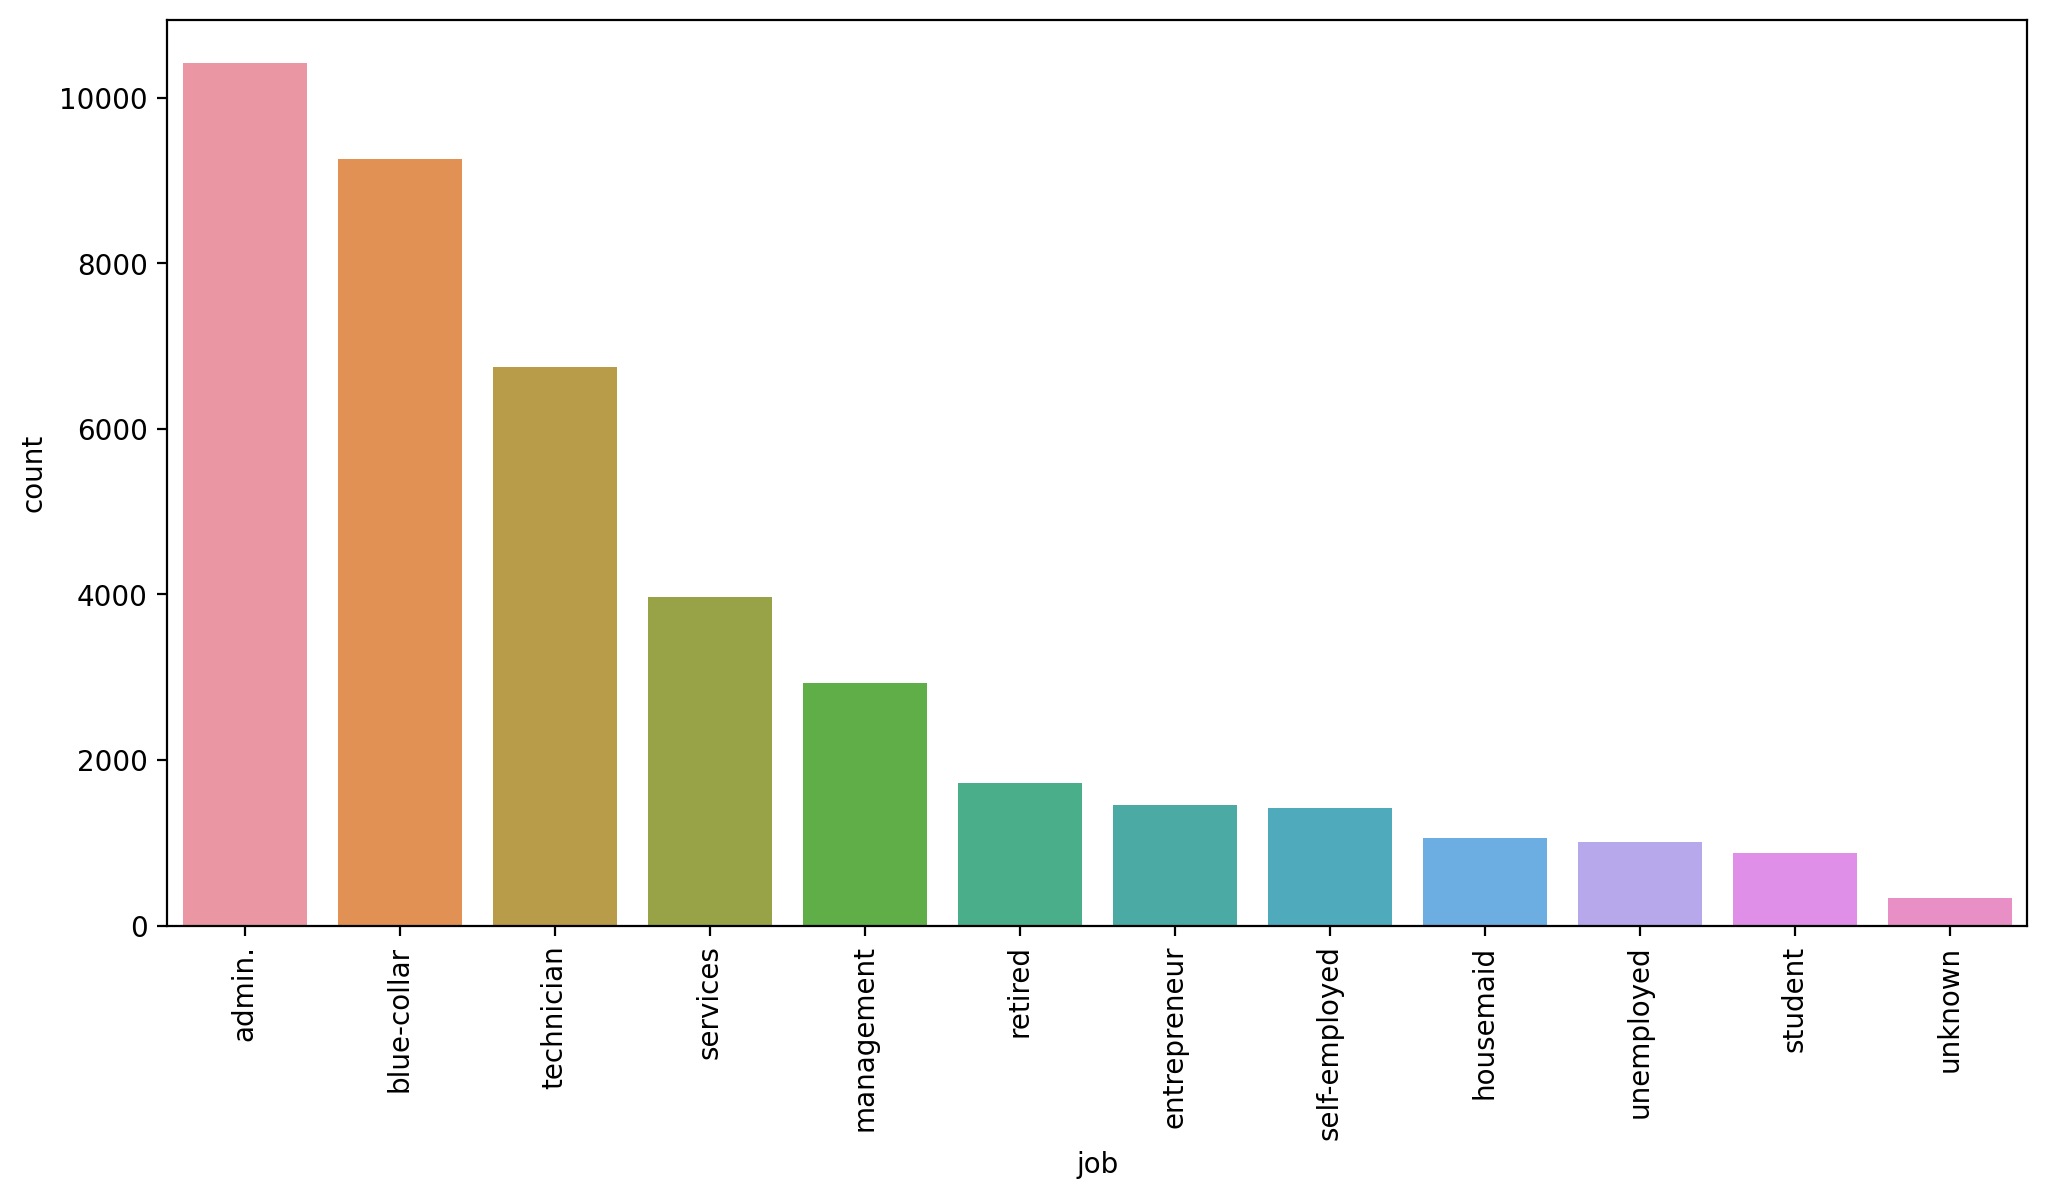

In [ ]:
plt.figure(figsize=(12,6),dpi=200)
# https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.xticks(rotation=90);

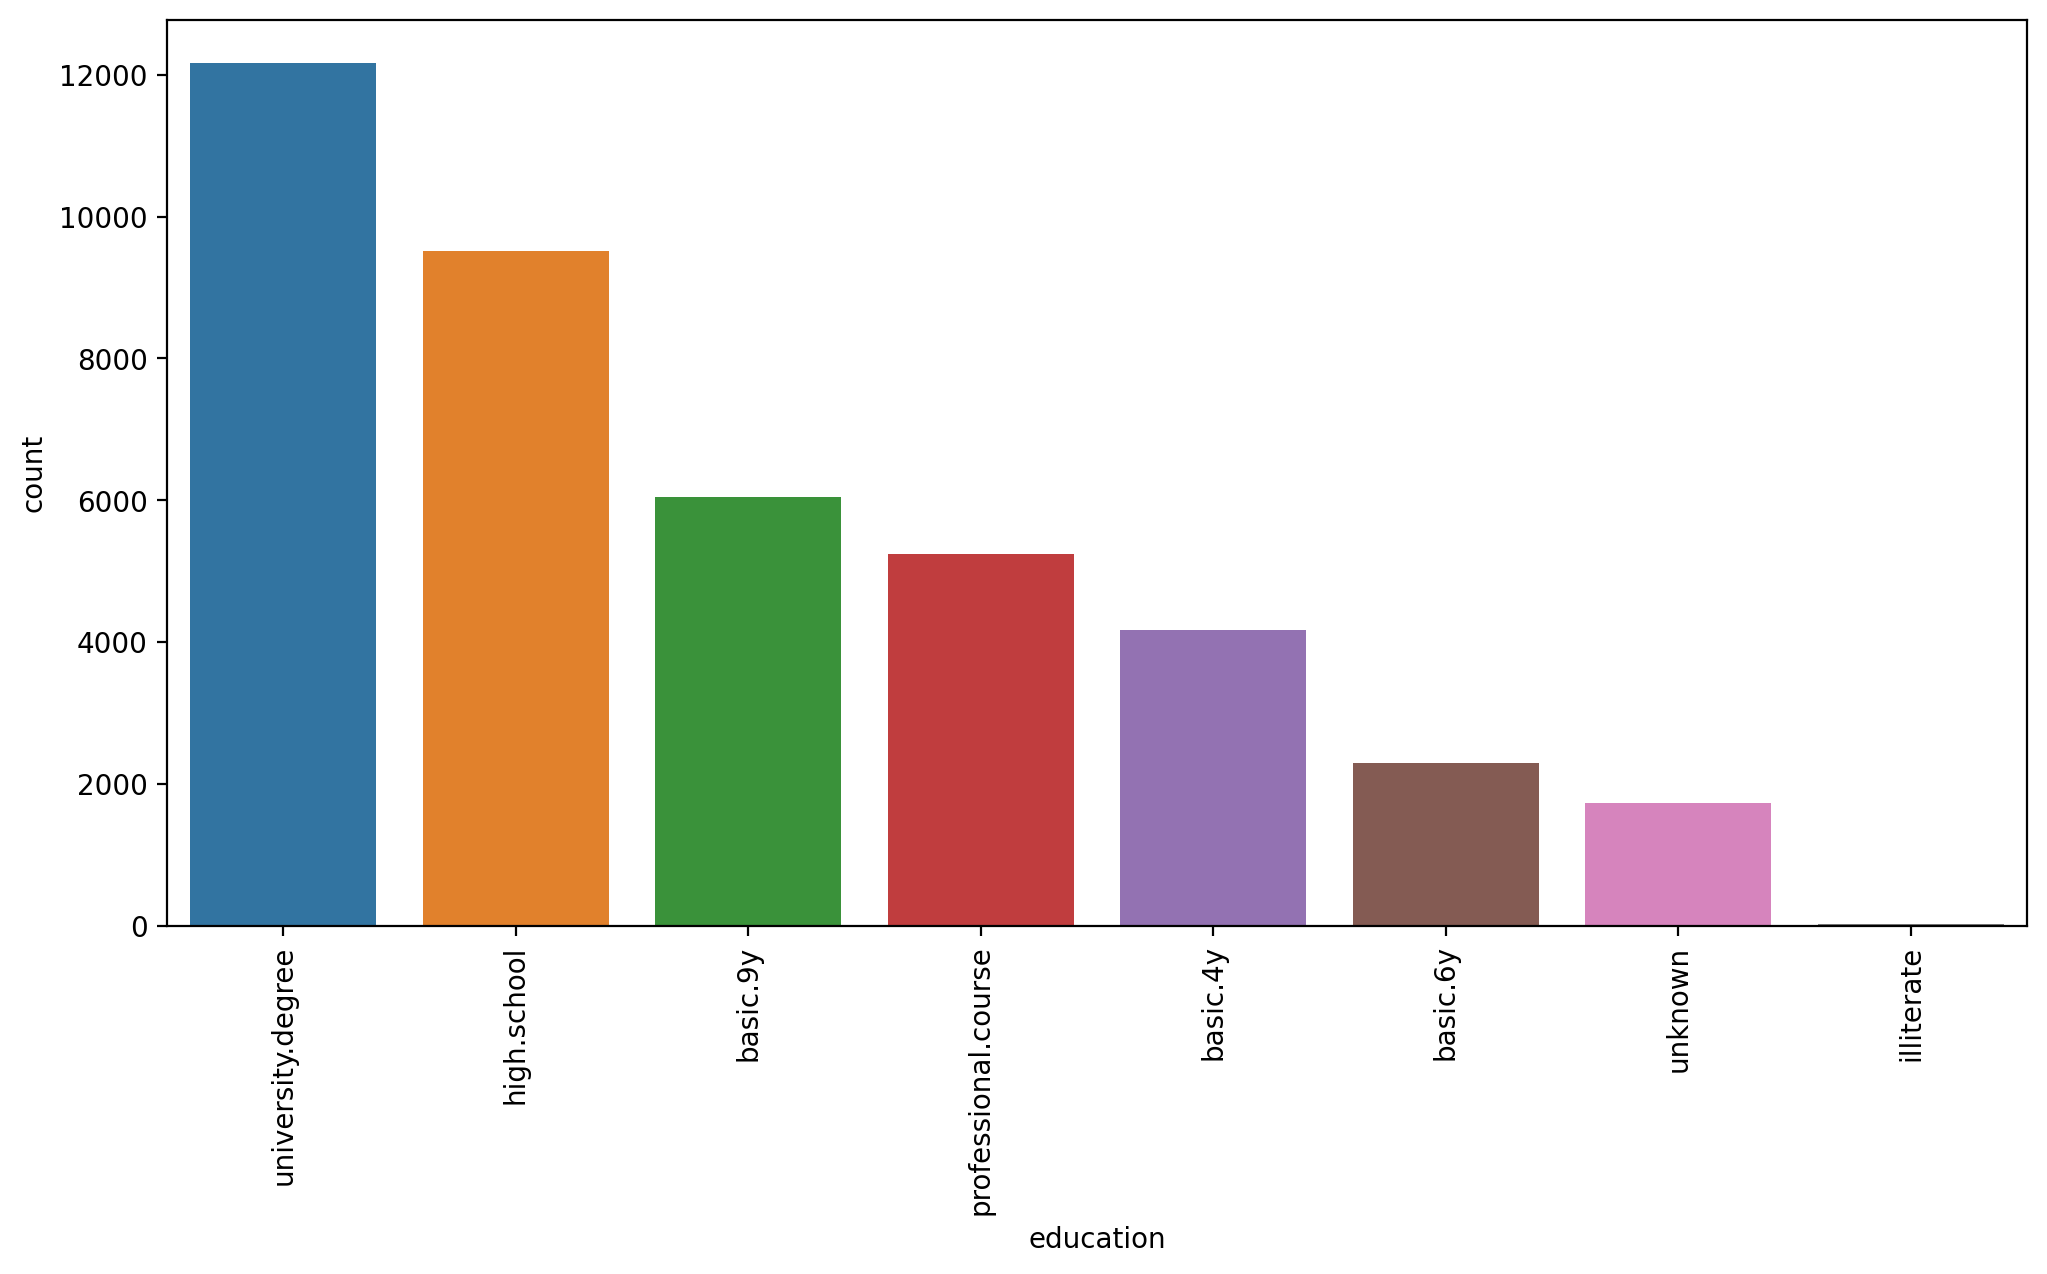

In [ ]:
plt.figure(figsize=(12,6),dpi=200)
# https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
sns.countplot(data=df,x='education', order=df['education'].value_counts().index)
plt.xticks(rotation=90);

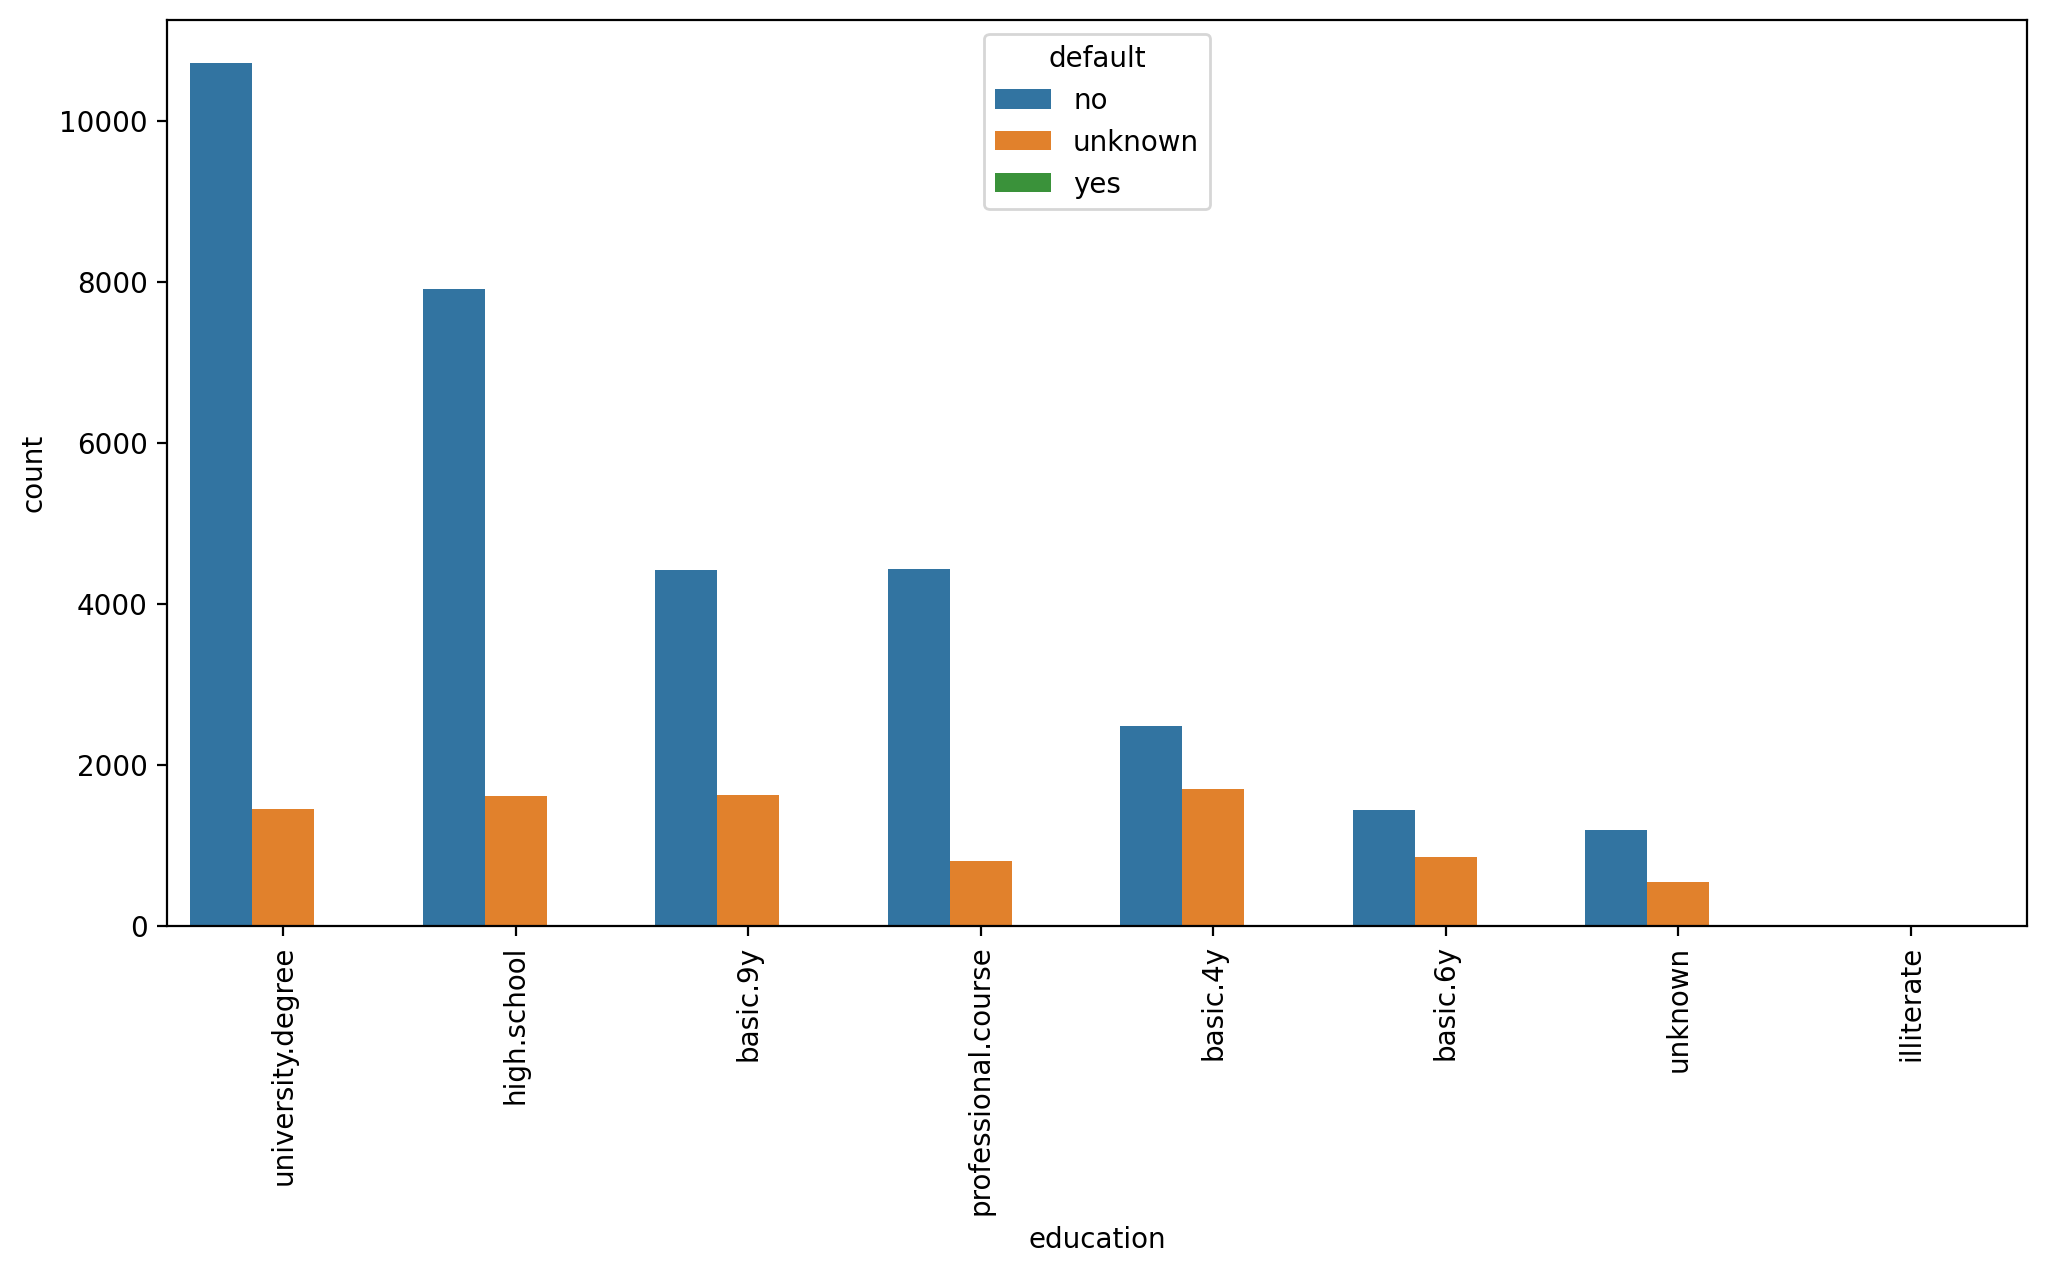

In [ ]:
# default: has credit in default? (categorical: 'no','yes','unknown')

plt.figure(figsize=(12,6),dpi=200)
# https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
sns.countplot(data=df,x='education',order=df['education'].value_counts().index, hue='default')
plt.xticks(rotation=90);

In [ ]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

* **Most customer dont have a credit loan by default.**
* **Some customer maybe didnt fill the form of default.**

---

## **C. Machine Learning Model**

### **a. Setup**

**UNSUPERVISED LEARNING REMINDER: NO NEED TO TRAIN TEST SPLIT!! NO LABEL TO "TEST" AGAINST!**

We do however need to transform categorical features into numeric ones where it makes sense to do so, as well as scaling the data due to distance being a key factor in clustering.

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
X = pd.get_dummies(df)

In [ ]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1


#### **Scaling the Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X = scaler.fit_transform(X)

---

### **b. K-Means Clustering**



Note of our method choices here:

* fit(X[, y, sample_weight])
    * Compute k-means clustering.

* fit_predict(X[, y, sample_weight])
    * Compute cluster centers and predict cluster index for each sample.

* fit_transform(X[, y, sample_weight])
    * Compute clustering and transform X to cluster-distance space.

* predict(X[, sample_weight])
    * Predict the closest cluster each sample in X belongs to.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2)

In [ ]:
cluster_labels = kmeans.fit_predict(scaled_X)

In [ ]:
# IMPORTANT NOTE: YOUR 0s and 1s may be opposite of ours,
# makes sense, the number values are not significant!
cluster_labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
len(scaled_X)

41188

In [ ]:
len(cluster_labels)

41188

In [ ]:
X['Cluster'] = cluster_labels

In [ ]:
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1


In [ ]:
feats = X.corr()['Cluster'].iloc[:-1].sort_values()
feats

previous               -0.478467
poutcome_failure       -0.464295
contact_cellular       -0.410476
month_apr              -0.357923
subscribed_yes         -0.294610
                          ...   
poutcome_nonexistent    0.544377
cons.price.idx          0.679372
nr.employed             0.886155
emp.var.rate            0.932612
euribor3m               0.959297
Name: Cluster, Length: 65, dtype: float64

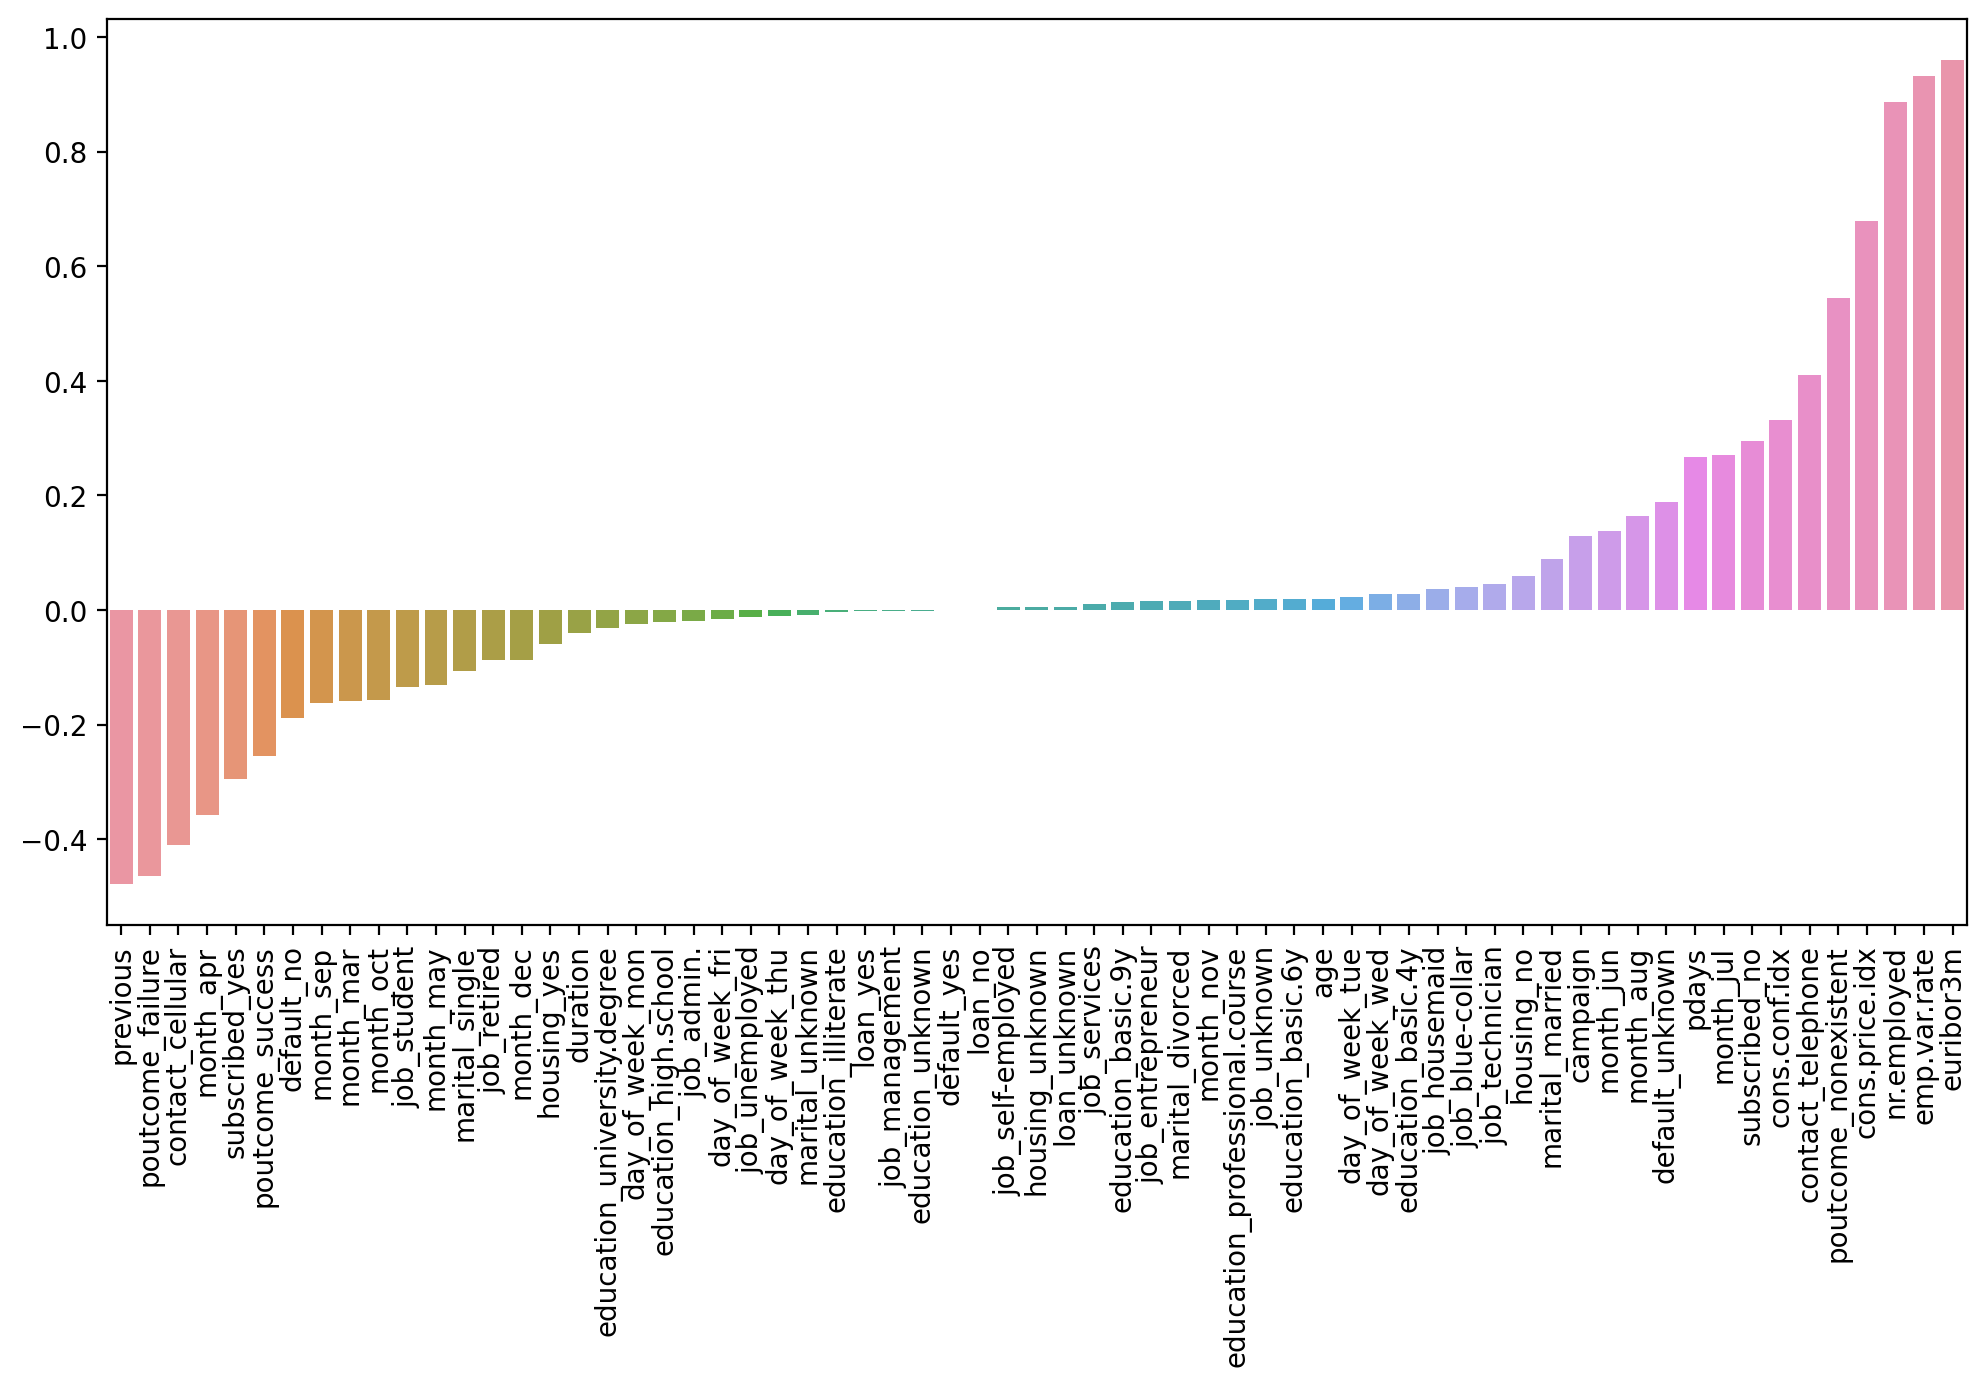

In [ ]:
# The impact of each feature on clustering decision
plt.figure(figsize=(12,6),dpi=200)
sns.barplot(x=feats.index, y=feats.values)
plt.xticks(rotation=90);

---

### **c. Choosing Best K Value**

In [ ]:
ssd = []

for k in range(2,11):
    
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_X)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(kmeans.inertia_)

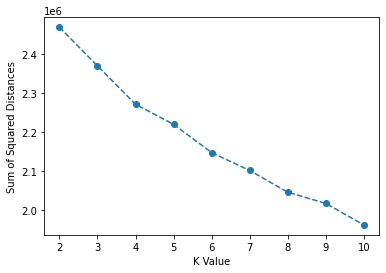

In [ ]:
plt.plot(range(2,11), ssd,'o--')
plt.xlabel("K Value")
plt.ylabel("Sum of Squared Distances");

**Based on the elbow method plot, we can choose 8 as a cluster**

Analyzing SSE Reduction

In [ ]:
pd.Series(ssd)

0    2.469792e+06
1    2.370416e+06
2    2.271504e+06
3    2.219763e+06
4    2.147163e+06
5    2.100938e+06
6    2.045181e+06
7    2.016197e+06
8    1.960799e+06
dtype: float64

In [ ]:
# Change in SSD from previous K value!
pd.Series(ssd).diff()

0             NaN
1   -99376.065056
2   -98912.785249
3   -51740.451153
4   -72600.511217
5   -46224.852729
6   -55756.636127
7   -28984.019077
8   -55398.304061
dtype: float64

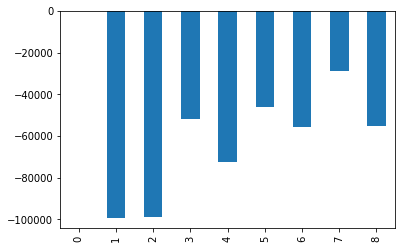

In [ ]:
pd.Series(ssd).diff().plot(kind='bar');

---
---

# **4 - K-Means Color Quantization**

In [ ]:
import numpy as np
import matplotlib.image as mpimg # library to read image
import matplotlib.pyplot as plt

---

## **A. The Image**

In [ ]:
image_as_array = mpimg.imread('/content/drive/MyDrive/Data_Science/Materi/Notes/15_Kmeans/palm_trees.jpg')

In [ ]:
image_as_array # RGB CODES FOR EACH PIXEL

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

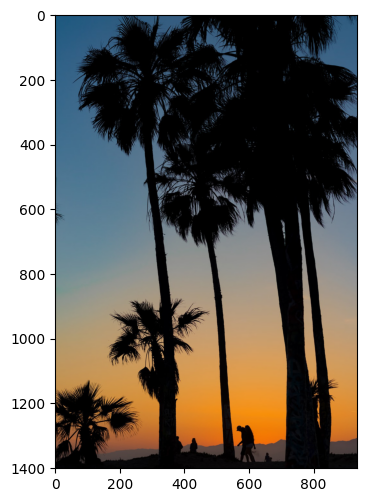

In [ ]:
plt.figure(figsize=(6,6),dpi=100)
plt.imshow(image_as_array);

---

## **B. Using Kmeans to Quantize Colors**

Quantizing colors means we'll reduce the number of unique colors here to K unique colors. Let's try just 6 colors!

### **a. Convert from 3d to 2d**

Kmeans is designed to train on 2D data (data rows and feature columns), so we can reshape the above strip by using (h,w,c) ---> (h * w,c)

In [ ]:
# (h,w,3 color channels) terdiri dari baris, kolom dan ketebalan/tumpukan
image_as_array.shape

(1401, 934, 3)

In [ ]:
# get heigth, weight, and color channels from image
h, w, c = image_as_array.shape

In [ ]:
# convert to 2d
image_as_array2d = image_as_array.reshape(h*w,c)

In [ ]:
# terdiri dari baris dan kolom
image_as_array2d.shape

(1308534, 3)

---

### **b. K-Means Quantization**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# cluster the Image RGB color to 6 cluster of RGB
kmeans_quant = KMeans(n_clusters=6)

In [ ]:
labels = kmeans_quant.fit_predict(image_as_array2d)

In [ ]:
labels

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [ ]:
# THESE ARE THE 6 RGB COLOR CODES!
kmeans_quant.cluster_centers_

array([[  2.75659154,   2.57529968,   3.70012508],
       [191.45660313, 154.52547084, 109.63137723],
       [ 71.12526864, 109.27679682, 137.69417556],
       [219.02710886, 135.42650506,  47.00342746],
       [136.73533325, 143.74401484, 143.9844705 ],
       [ 67.25337203,  61.54496264,  62.01242432]])

---

### **c. Convert 2d to 3d for Quantized image**

In [ ]:
rgb_codes = kmeans_quant.cluster_centers_.round(0).astype(int)

In [ ]:
# We will change the image RGB to these new RGB based on cluster label
rgb_codes

array([[  3,   3,   4],
       [191, 155, 110],
       [ 71, 109, 138],
       [219, 135,  47],
       [137, 144, 144],
       [ 67,  62,  62]])

In [ ]:
rgb_codes[0]

array([3, 3, 4])

In [ ]:
# Beware of np.reshape and .reshape
quantized_image = np.reshape(rgb_codes[labels], (h, w, c)) # convert RGB cluster 2D to 3D

In [ ]:
quantized_image

array([[[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 67,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 67,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

In [ ]:
quantized_image.shape

(1401, 934, 3)

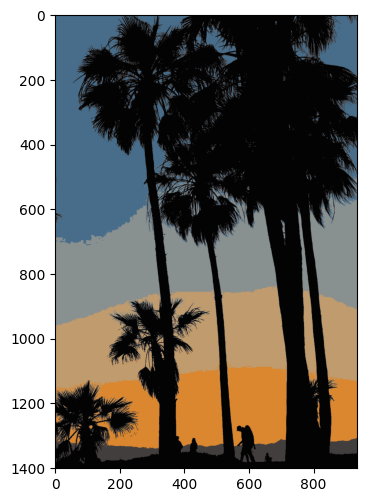

In [ ]:
# Plot the quantized image
plt.figure(figsize=(6,6),dpi=100)
plt.imshow(quantized_image);

---
---